In [376]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.express as px
from pywt import wavedec
from pywt import waverec
from scipy.signal import hilbert
from sklearn.cluster import KMeans
from pywt import *
import plotly.express as px

In [377]:
def get_data():

    global df
    
    # defining the directory of files
    labeled1_dir =r"D:\Arai4_Projects\spinewise\ML_Project\data\labeled\movement_scription\AW01-HBS-COMBINED-2022-11-8-14-16-48-1667918184-v1.4.3+lucina-buzz.csv"
    labeled2_dir =r"D:\Arai4_Projects\spinewise\ML_Project\data\labeled\movement_scription\MYR-NC1-COMBINED-201-1-1-9-49-33-1668690240-v1.4.3+lucina-buzz.csv"
    labeled3_dir =r"D:\Arai4_Projects\spinewise\ML_Project\data\labeled\movement_scription\PR01-PVH-COMBINED-201-1-1-5-33-24-1668722167-v1.4.3+lucina-buzz-to-nobuzz.csv"
    unlabel1_dir =r"D:\Arai4_Projects\spinewise\ML_Project\data\unlabeled\063-COMBINED-2022-11-9-11-45-31-1668002846-v1.4.3+lucina-buzz.csv"
    unlabel2_dir =r"D:\Arai4_Projects\spinewise\ML_Project\data\unlabeled\065-COMBINED-2022-10-24-8-32-26-1666642384-v1.4.3+lucina-buzz.csv"
    unlabel3_dir =r"D:\Arai4_Projects\spinewise\ML_Project\data\unlabeled\068-COMBINED-2022-10-27-4-59-51-1666873651-v1.4.3+lucina-buzz.csv"
    
    df_main= pd.read_csv(labeled2_dir)
    df_main = df_main.iloc[75:]
    df = df_main[['ts_r','acc_x_n','acc_y_n','acc_z_n','label']]
    df = df.dropna()
    
    return df
    

get_data()

,ts_r,acc_x_n,acc_y_n,acc_z_n,label
75,884121.0,0.846191,0.011475,-0.557129,staan
76,884122.0,0.848145,0.010742,-0.558594,staan
77,884123.0,0.852783,0.010498,-0.554688,staan
78,884124.0,0.851807,-0.001221,-0.559326,staan
79,884125.0,0.850586,0.013184,-0.546631,staan
...,...,...,...,...,...
7495,891541.0,1.135010,0.012451,-0.167480,staan
7496,891542.0,1.021729,-0.004883,0.015625,staan
7497,891543.0,0.811523,0.040527,-0.600098,staan
7498,891544.0,0.855713,0.152832,-0.391846,staan


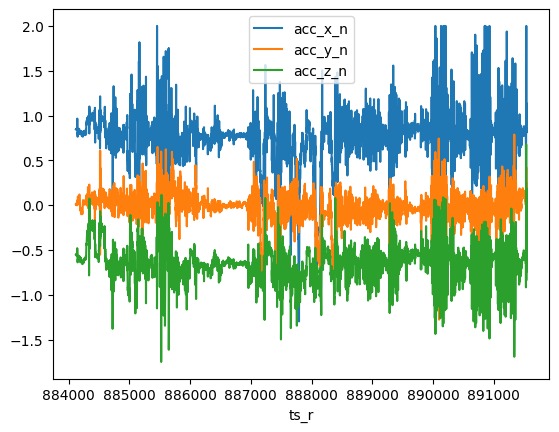

In [378]:
def viz_data(data):
    ax = plt.gca()
    #ax.set_xlim(data['ts_r'].iloc[0], data['ts_r'].iloc[0] + 2000) 
    data.plot(kind='line',x='ts_r',y='acc_x_n',ax=ax)
    data.plot(kind='line',x='ts_r',y='acc_y_n',ax=ax)
    data.plot(kind='line',x='ts_r',y='acc_z_n',ax=ax)
    


viz_data(df)

In [379]:
def viz_hilbert_filter(data):
    ax = plt.gca()
    #ax.set_xlim(data['ts_r'].iloc[0], data['ts_r'].iloc[0] + 4000) 
    data.plot(kind='line',x='ts_r',y='acc_x_n_hilbert',ax=ax)
    data.plot(kind='line',x='ts_r',y='acc_y_n_hilbert',ax=ax)
    data.plot(kind='line',x='ts_r',y='acc_z_n_hilbert',ax=ax)


In [380]:
def viz_haar_filter(data):
    ax = plt.gca()
    #ax.set_xlim(data['ts_r'].iloc[0], data['ts_r'].iloc[0] + 2000) 
    data.plot(kind='line',x='ts_r',y='acc_x_n_haar',ax=ax)
    data.plot(kind='line',x='ts_r',y='acc_y_n_haar',ax=ax)
    data.plot(kind='line',x='ts_r',y='acc_z_n_haar',ax=ax)

,ts_r,acc_x_n,acc_y_n,acc_z_n,label,acc_x_n_hilbert,acc_y_n_hilbert,acc_z_n_hilbert
75,884121.0,-0.153809,0.011475,-0.557129,staan,0.153841,0.088260,0.585433
76,884122.0,-0.151855,0.010742,-0.558594,staan,0.151857,0.012254,0.561528
77,884123.0,-0.147217,0.010498,-0.554688,staan,0.148837,0.027888,0.559509
78,884124.0,-0.148193,-0.001221,-0.559326,staan,0.148490,0.008264,0.559439
79,884125.0,-0.149414,0.013184,-0.546631,staan,0.152043,0.014738,0.547598
...,...,...,...,...,...,...,...,...
7495,891541.0,0.135010,0.012451,-0.167480,staan,0.138274,0.126664,0.449935
7496,891542.0,0.021729,-0.004883,0.015625,staan,0.204086,0.042038,0.385759
7497,891543.0,-0.188477,0.040527,-0.600098,staan,0.225146,0.139601,0.648023
7498,891544.0,-0.144287,0.152832,-0.391846,staan,0.144498,0.170828,0.392491


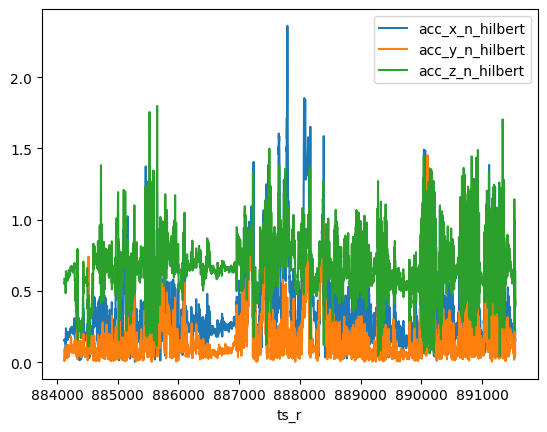

In [381]:
def apply_hilbert_filter():

    df['acc_x_n'] -= 1 # shift the values vertically down by 1
    df['acc_x_n_hilbert'] = np.abs(hilbert(df['acc_x_n']))
    df['acc_y_n_hilbert'] = np.abs(hilbert(df['acc_y_n']))
    df['acc_z_n_hilbert'] = np.abs(hilbert(df['acc_z_n']))
    viz_hilbert_filter(df) # visualize hilbert filter output


    return df

apply_hilbert_filter()



[0.21905797 0.21905797 0.21905797 ... 0.27675855 0.27675855 0.27675855]
[0.12460916 0.12460916 0.12460916 ... 0.1468146  0.1468146  0.1468146 ]
[0.55647238 0.55647238 0.55647238 ... 0.67558006 0.67558006 0.67558006]


c:\Users\32467\anaconda3\envs\sw_env\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



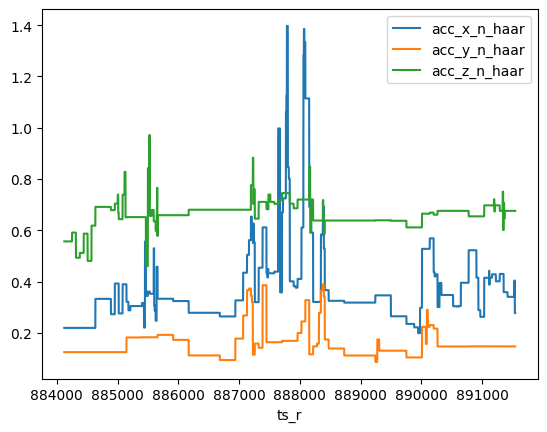

In [382]:

def apply_haar_filter(data):
    #construct wavelets
    global time_series_filtered

    wavelet_type='haar'
    coeffs = wavedec(data.values, wavelet_type)
    # coeffs = wavedec(data.values, 'haar')

    # threshold
    threshold = 1.0

    # perform the thresholding
    coeffs_thresholded = [np.maximum(np.abs(c) - threshold, 0) * np.sign(c) for c in coeffs]

    # reconstruct time domain
    time_series_filtered = waverec(coeffs_thresholded, wavelet_type)
    
    print(time_series_filtered)
    
    return time_series_filtered


def call_haar_filter(data):
    data = df.iloc[1:] # drop the first row to match the size of df with output of haar filter
    for column in ['acc_x_n_hilbert','acc_y_n_hilbert','acc_z_n_hilbert']:
        data[column[:8] + 'haar']= apply_haar_filter(data[column])
    viz_haar_filter(data) # visualize output of haar filter
    
    return data
df= call_haar_filter(df)

In [ ]:
def applying_segemntation():
    pass

In [ ]:
def applying_symbolic_aggregation():
    pass

In [ ]:
def applying_pca():
    pass

In [383]:
def train_model(df):
    model = KMeans(n_clusters=5)
    data = df[['acc_x_n_haar', 'acc_y_n_haar', 'acc_z_n_haar']]
    model.fit(data)
    return model

In [384]:
def evaluate_model(df):
    model = train_model(df)
    #df_clustered= pd.DataFrame(label, columns =['c_label'])
    df['cluster'] = model.labels_
    # ax = plt.gca()
    # #ax.set_xlim(data['ts_r'].iloc[0], data['ts_r'].iloc[0] + 4000) 
    # df.plot(kind='scatter',x='ts_r',y='cluster',ax=ax)
    return df
    


df = evaluate_model(df)


c:\Users\32467\anaconda3\envs\sw_env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [387]:
px.scatter(df, x='ts_r', y='acc_x_n', color='cluster')

In [386]:
px.scatter(df, x='ts_r', y='acc_x_n', color='label')

<AxesSubplot:xlabel='label'>

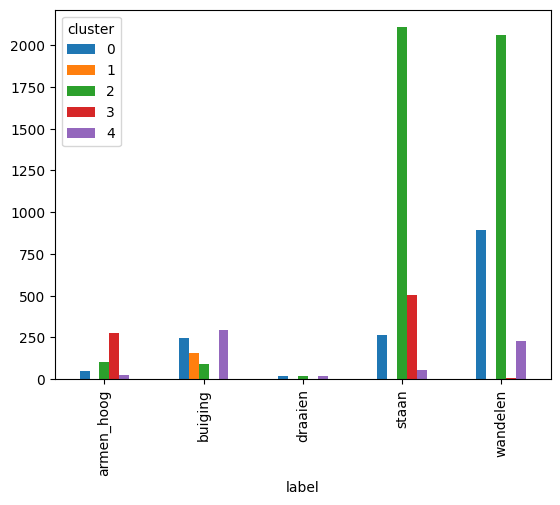

In [389]:


df.groupby(['label', 'cluster']).size().unstack(level=1).plot(kind='bar')
